In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,NaN,132.0,Yes
4,"5,8",142.0,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       90 non-null     object 
 1   iq         100 non-null    float64
 2   placement  100 non-null    object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [15]:
df['cgpa'] = df['cgpa'].astype(str).str.replace(',', '.').astype(float)

In [17]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,Yes
1,5.9,106.0,No
2,5.3,121.0,No
3,NaN,132.0,Yes
4,5.8,142.0,No


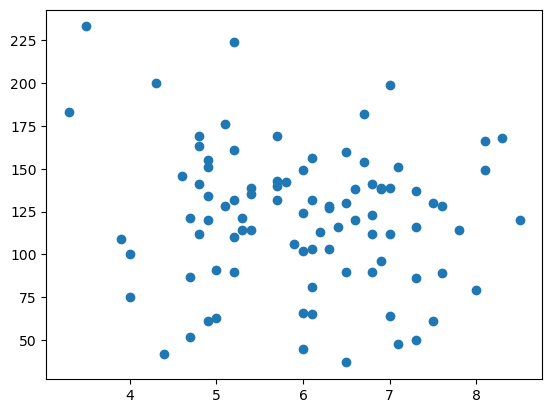

In [19]:
plt.scatter(df['cgpa'], df['iq'])

In [21]:
X = df.drop(columns=['placement'])
y = df['placement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(strategy='mean')

from sklearn.compose import ColumnTransformer
ct= ColumnTransformer([('simpleimputer', si , ['cgpa'])], remainder='passthrough')
X_train= ct.fit_transform(X_train)
X_test= ct.transform(X_test)

In [25]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train= le.fit_transform(y_train)
y_test = le.transform(y_test)

In [27]:
X_train = pd.DataFrame(X_train, columns=['cgpa', 'iq'])
X_test = pd.DataFrame(X_test, columns=['cgpa', 'iq'])

X_train.head()

,cgpa,iq
0,7.800000,114.0
1,5.988732,149.0
2,7.000000,199.0
3,7.600000,89.0
4,8.500000,120.0


In [31]:
print("\nEncoded Training Target:")
print(y_train)


Encoded Training Target:
[1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1
 1 1 1 0 0 0]


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    80 non-null     float64
 1   iq      80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [39]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8
